# Geometric Representation of Regression

A picture is worth a thousand words. The below graphic captures the essense of Multiple Regression very aptly.

![Regression Picture](./regression.png)

[This post](http://stats.stackexchange.com/questions/123651/geometric-interpretation-of-multiple-correlation-coefficient-r-and-coefficient) on Stack Exchange gives a great description of the graphic and geometric representation of regression problems. 

Source: [Stack Exchange](http://stats.stackexchange.com/questions/123651/geometric-interpretation-of-multiple-correlation-coefficient-r-and-coefficient)

**Let's see this in action.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
x = np.array([1.0, 2, 3])
y = np.array([2, 2.5, 5])

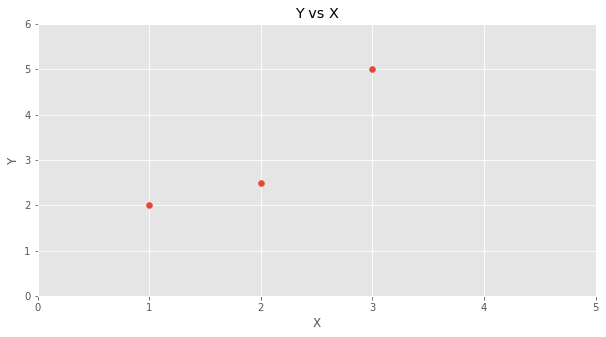

In [4]:
fig = plt.figure()
plt.scatter(x, y)
plt.xlim((0, 5))
plt.ylim((0, 6))
plt.title("Y vs X")
plt.xlabel("X")
plt.ylabel("Y")
plt.gcf().set_size_inches(10, 5)
plt.show()

We know that the linear regression coefficients are given by:

\begin{equation}
\beta = (\mathbf{X^\intercal} \mathbf{X})^{-1} \mathbf{X^\intercal} y
\end{equation}


In [5]:
X = np.append(np.ones(len(x)), x).reshape(2, 3).T

In [6]:
X

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.]])

In [7]:
beta = np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), np.matmul(X.transpose(), y).T)
print(beta)

[ 0.16666667  1.5       ]


In [8]:
b_0 = beta[0]
b_1 = beta[1]

Let us calculate our \$\hat y\$

In [9]:
y_hat = np.matmul(X, beta)

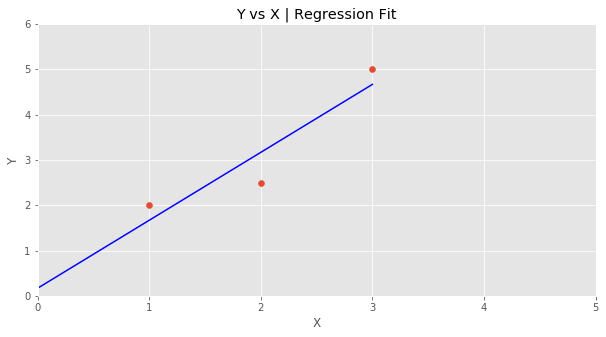

In [10]:
fig = plt.figure()
plt.scatter(x, y)
plt.xlim((0, 5))
plt.ylim((0, 6))
plt.title("Y vs X | Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.append([0], x), np.append([b_0], y_hat), color='blue')
plt.gcf().set_size_inches(10, 5)
plt.show()

In [11]:
res = y - y_hat
print(res)

[ 0.33333333 -0.66666667  0.33333333]


Now the average vector $\bar y$

In [12]:
y_bar = np.mean(y) * np.ones(len(y))
print(y_bar)

[ 3.16666667  3.16666667  3.16666667]


In [13]:
base = y_hat - y_bar
print(base)

[ -1.50000000e+00   1.33226763e-15   1.50000000e+00]


In [14]:
dot_product = np.dot(base, res)
print(dot_product)

0.0


Hence, we see that dot product between residual $\epsilon$ and $\hat y - \bar y$ equals $0$

In [15]:
hyp = y - y_bar
print(hyp)

[-1.16666667 -0.66666667  1.83333333]


Let's check the `Pythagoras Theorem`

In [16]:
print(np.power(np.linalg.norm(hyp), 2) - np.power(np.linalg.norm(base), 2) - np.power(np.linalg.norm(res), 2))

3.33066907388e-16


which is practically $0$

## Summary

Through this post, I wanted to demonstrate how we can interpret linear/multiple regression geometrically. Also, I also demonstrated how solve a linear model through linear algebra. 